In [0]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = "/content/players.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
base_dir = '/tmp/players'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat/dog pictures
train_messi_dir = os.path.join(train_dir, 'Lionel Messi')
train_ronaldo_dir = os.path.join(train_dir, 'Cristiano Ronaldo')
train_dybala_dir = os.path.join(train_dir, 'Paulo Dybala')
train_aguero_dir = os.path.join(train_dir, 'Sergio Aguero')
train_romero_dir = os.path.join(train_dir, 'Sergio Romero')

# Directory with our validation cat/dog pictures
validation_messi_dir = os.path.join(validation_dir, 'Lionel Messi')
validation_ronaldo_dir = os.path.join(validation_dir, 'Cristiano Ronaldo')
validation_dybala_dir = os.path.join(validation_dir, 'Paulo Dybala')
validation_aguero_dir = os.path.join(validation_dir, 'Sergio Aguero')
validation_romero_dir = os.path.join(validation_dir, 'Sergio Romero')

In [4]:
print('total training messi images :', len(os.listdir( train_messi_dir ) ))
print('total training ronaldo images :', len(os.listdir(train_ronaldo_dir ) ))

print('total validation messi images :', len(os.listdir(validation_messi_dir ) ))
print('total validation ronaldo images :', len(os.listdir(validation_ronaldo_dir ) ))

total training messi images : 15
total training ronaldo images : 15
total validation messi images : 5
total validation ronaldo images : 5


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
   
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'), 
  
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(5, activation='softmax')  
])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=1,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=1,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [49]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
75/75 [==============================] - 7s 90ms/step - loss: 0.2634 - accuracy: 0.9333 - val_loss: 8.6934 - val_accuracy: 0.4400
Epoch 2/5
75/75 [==============================] - 7s 90ms/step - loss: 0.6236 - accuracy: 0.9067 - val_loss: 9.2214 - val_accuracy: 0.5600
Epoch 3/5
75/75 [==============================] - 7s 90ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 11.2840 - val_accuracy: 0.4800
Epoch 4/5
75/75 [==============================] - 7s 91ms/step - loss: 0.5606 - accuracy: 0.9467 - val_loss: 13.8676 - val_accuracy: 0.6000
Epoch 5/5
75/75 [==============================] - 7s 92ms/step - loss: 0.2646 - accuracy: 0.9467 - val_loss: 9.2040 - val_accuracy: 0.6000


Saving Sports-2019-10-20T075511.751.png to Sports-2019-10-20T075511.751 (1).png
Saving Sergio_Romero_(ManUtd).jpg to Sergio_Romero_(ManUtd) (2).jpg
Saving lionelmessi-cropped13i87ywm9z70a1bbft8oj3cm56jpg.jpg to lionelmessi-cropped13i87ywm9z70a1bbft8oj3cm56jpg (4).jpg
Saving indeyrdryx.jpg to indeyrdryx (4).jpg
Saving intfydex.jpg to intfydex (4).jpg


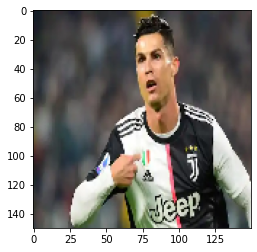

[1. 0. 0. 0. 0.]
Sports-2019-10-20T075511.751.png is Cristiano Ronaldo


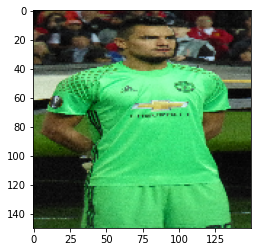

[0. 0. 0. 0. 1.]
Sergio_Romero_(ManUtd).jpg is Sergio Romero


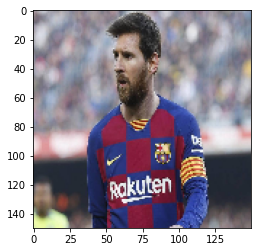

[0. 1. 0. 0. 0.]
lionelmessi-cropped13i87ywm9z70a1bbft8oj3cm56jpg.jpg is Lionel Messi


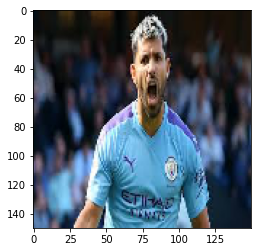

[0. 0. 0. 1. 0.]
indeyrdryx.jpg is Sergio Aguero


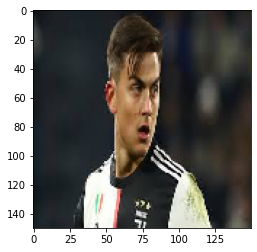

[0. 0. 1. 0. 0.]
intfydex.jpg is Paulo Dybala


In [62]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.show()
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

  if classes[0][0]==1:
    print(fn + " is Cristiano Ronaldo")
    
  elif classes[0][1]==1:
    print(fn + " is Lionel Messi")
  elif classes[0][2]==1:
    print(fn + " is Paulo Dybala")
  elif classes[0][3]==1:
    print(fn + " is Sergio Aguero")
  elif classes[0][4]==1:
    print(fn + " is Sergio Romero")
  
